### **INTRODUCTION TO COMPUTATIONAL MODELS**
#### **Assigment 4: Support Vector Machines**
- **Universidad de Córdoba**
- **Escuela Politécnica Superior de Córdoba**
- **Cmputer Science Engineering Degree**
- **Mention: Computation**
- **Fourth year - First quadrimester**
- **Author:** Ventura Lucena Martínez
- **Email:** <i72lumav@uco.es>
---

#### Abstract
This lab assignment serves to familiarise with support vector machines (SVMs). In
this way, we will use the SVMs for various classification problems, to understand their
behaviour and, above all, the effect of their parameters. To do this, we will use the
[`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm) library, which is one of the most efficient implementations available nowadays,
as well as being free and open source.

#### Introduction
In this lab assignment, we are going to carry out different exercises to better understand
the behaviour of support vector machines (SVMs) in classification problems. SVMs have
become, since some years ago, the state of the art in pattern recognition problems, and it
is important to know how they work and how they respond to their different parameters.

The lab assignment will be done using the `libsvm` library (included in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)), which is one of the most
popular and efficient implementations available nowadays. In all cases, we will consider
the “C-SVC” version, included in `libsvm`.

#### 2D representation of SVMs
To make the graphic representation in two dimensions from Python, we are going to use
the script `libsvm.py`. Initially, we can see the predetermined SVM with the first dataset
`dataset1.csv`. This SVM has the following parameters:
- kernel: non linear function used to project the information to a larger space of
characteristics. Its use depends if the data is linearly separable or not.
- C: regularization parameter. The strength of the regularization is inversely proportional
to C. Must be positive. The penalty is a quared *l*2 penalty.

<ipython-input-2-4df414642a6f>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)


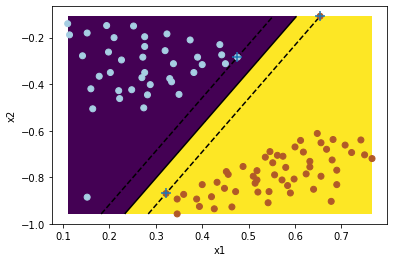

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

# Load the dataset.
data = pd.read_csv('../datasets/csv/dataset1.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train the SVM model.
svm_model = svm.SVC(kernel='linear', C=1000)
svm_model.fit(X, y)

# Plot the points.
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Plot the support vectors class regions, the separating hyperplane and the margins.
plt.axis('tight')
# |->Plot support vectors.
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], marker='+', s=100, zorder=10, cmap=plt.cm.Paired)

# |-> Extract the limits.
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# |-> Create a grid with all the points and then obtain the SVM score for all the points.
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# |-> Plot the results in a countour.
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()